In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/CarPrice_Assignment.csv
/kaggle/input/car-prices/Data Dictionary - carprices.xlsx


In [2]:
car_price=pd.read_csv("/kaggle/input/car-prices/CarPrice_Assignment.csv")
car_price['fueltype'].replace({'gas':1,'diesel':2},inplace=True)
car_price['doornumber'].replace({'two':2,'four':4},inplace=True)
car_price['enginelocation'].replace({'front':1000,'rear':2000},inplace=True)
print(car_price['carbody'].unique())
car_price['carbody'].replace({'convertible':6,'hatchback':2,'sedan':3,'wagon':4,'hardtop':5},inplace=True)
print(car_price['fuelsystem'].unique())
car_price['fuelsystem'].replace({'mpfi':1,'idi':2,'2bbl':3,'mfi':4,'1bbl':5,'spfi':6,'4bbl':7,'spdi':8},inplace=True)
car_price['aspiration'].replace({'std':1,'turbo':2},inplace=True)
print(car_price['cylindernumber'].unique())
car_price['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12},inplace=True)
print(car_price['drivewheel'].unique())
car_price['drivewheel'].replace({'rwd':1,'fwd':2,'4wd':3},inplace=True)
car_price

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['rwd' 'fwd' '4wd']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,2,6,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,2,6,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,2,2,1,1000,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,4,3,2,1000,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,4,3,3,1000,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,4,3,1,1000,109.1,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,2,4,3,1,1000,109.1,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,1,4,3,1,1000,109.1,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,2,2,4,3,1,1000,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
car_price.set_index("car_ID",inplace=True)

In [4]:
car_price.drop(['CarName','doornumber','enginetype'],axis=1,inplace=True)

In [5]:
car_price.corr()['price']

symboling          -0.079978
fueltype            0.105679
aspiration          0.177926
carbody             0.312111
drivewheel         -0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
fuelsystem         -0.393677
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [6]:
car_price.drop(['symboling','compressionratio','peakrpm','stroke','carheight','fueltype','aspiration'],axis=1,inplace=True)
car_price.corr()['price']

carbody           0.312111
drivewheel       -0.577992
enginelocation    0.324973
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
cylindernumber    0.718305
enginesize        0.874145
fuelsystem       -0.393677
boreratio         0.553173
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Name: price, dtype: float64

In [7]:
car_price

,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,6,1,1000,88.6,168.8,64.1,2548,4,130,1,3.47,111,21,27,13495.0
2,6,1,1000,88.6,168.8,64.1,2548,4,130,1,3.47,111,21,27,16500.0
3,2,1,1000,94.5,171.2,65.5,2823,6,152,1,2.68,154,19,26,16500.0
4,3,2,1000,99.8,176.6,66.2,2337,4,109,1,3.19,102,24,30,13950.0
5,3,3,1000,99.4,176.6,66.4,2824,5,136,1,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,3,1,1000,109.1,188.8,68.9,2952,4,141,1,3.78,114,23,28,16845.0
202,3,1,1000,109.1,188.8,68.8,3049,4,141,1,3.78,160,19,25,19045.0
203,3,1,1000,109.1,188.8,68.9,3012,6,173,1,3.58,134,18,23,21485.0


In [8]:
car_price.shape
car_price.loc[16]

carbody               3.00
drivewheel            1.00
enginelocation     1000.00
wheelbase           103.50
carlength           189.00
carwidth             66.90
curbweight         3230.00
cylindernumber        6.00
enginesize          209.00
fuelsystem            1.00
boreratio             3.62
horsepower          182.00
citympg              16.00
highwaympg           22.00
price             30760.00
Name: 16, dtype: float64

In [9]:
car_price_scaled=car_price.copy()
mini=car_price['price'].min()
maxi=car_price['price'].max()
print(mini,maxi)
for c in car_price_scaled:
    car_price_scaled[c]=car_price_scaled[c]/car_price_scaled[c].abs().max()


5118.0 45400.0


In [10]:
car = car_price.sample(frac=0.3, random_state=42)
y_test = car.to_numpy()[:, -1]
for c in car.columns:
    car[c] = car[c] / car[c].abs().max()


x_test = car.to_numpy()[:, :-1]  


x_train = car_price_scaled.to_numpy()[:, :-1]
y_train = car_price.to_numpy()[:, -1]


In [11]:
def model(x,y,learning_rate,iterations):
    m=y.size
    theta=np.zeros((x.shape[1],1))
    y_rev=np.zeros(y.shape)
    cost_list=[]
    y_actual=[]
    for i in range(iterations):
        y_pred=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot(x.T,(y_pred-y))
        theta=theta-(learning_rate*d_theta)
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print("cost is:",cost)
    y_rev=(y_pred*(maxi-mini))+mini
    print(y_rev.shape)
    print(y_pred.shape)
    print(x.shape)
    print(theta.shape)
    print(d_theta.shape)
    print(m)
    return theta,cost_list,y_pred

In [12]:
iteration=20000
learning_rate=0.2
theta,cost_list,y_pred=model(x_train,y_train.reshape(y_train.size,1),learning_rate,iteration)

cost is: 119890739.74557047
cost is: 5126584.482923263
cost is: 4929926.6512489095
cost is: 4853377.5842421
cost is: 4816634.121719138
cost is: 4795238.199033874
cost is: 4780899.204871149
cost is: 4770451.392624601
cost is: 4762487.276925041
cost is: 4756267.1097817
(205, 1)
(205, 1)
(205, 14)
(14, 1)
(14, 1)
205


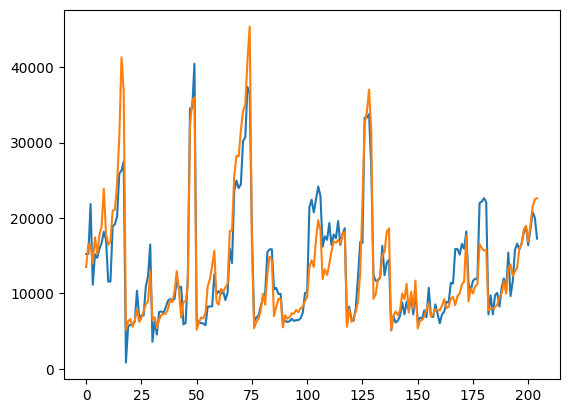

In [13]:
plt.plot(y_pred)
plt.plot(y_train)

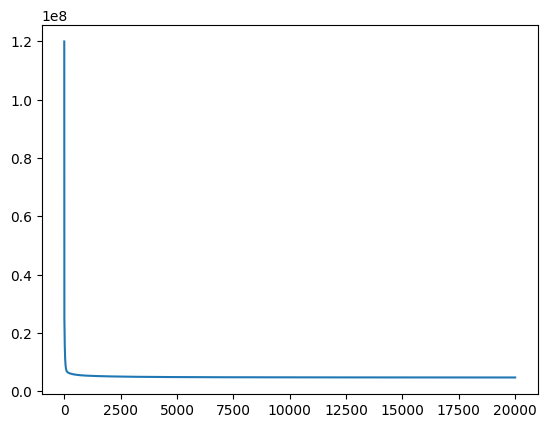

<Figure size 1500x1500 with 0 Axes>

In [14]:
plt.plot(cost_list)
fig = plt.figure(figsize=(15,15))
fig.show()


In [15]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y_train)
print(r2*100,"%")

82.21153999021152 %


(14, 1)
81.24060212415529 %


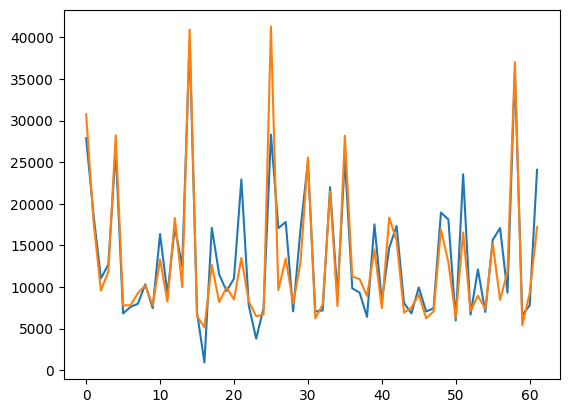

In [16]:


print(theta.shape)
print((r2_score(np.dot(x_test,theta),y_test)*100),'%')
plt.plot(np.dot(x_test,theta))
plt.plot(y_test)

Text(0, 0.5, 'Loss')

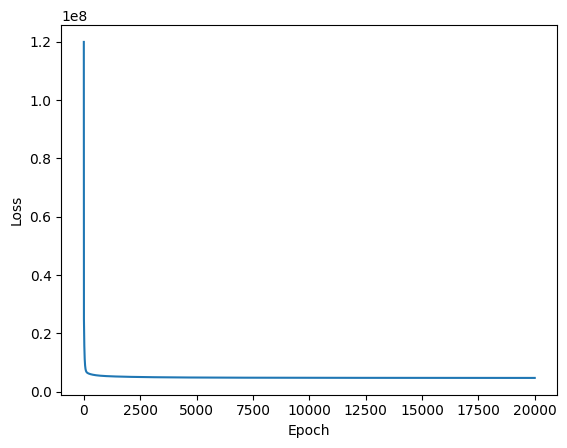

In [17]:
plt.plot(range(iteration), cost_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')